# Project Capstone:  NBA PLAYERS SCORING PREDICTION
## Nicolas Monvert, EPFL Extension School 2020
## Part 3 : Machine Learning 2

Same exercice as the previous notebook ML, but for a different player.<br>
Dwayne Wade, similarly as LeBron James started his career in 2003 and ended up last season. He mainly played for the Miami Heat, he was considered as a very good asset for the team and has been selected as an all star player quite often.

### Import main librairies

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold

### Load CSV Files

In [2]:
dwa = pd.read_csv('dwa.csv')
print(dwa.shape)
dwa.head(3)

(1299, 104)


,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,FG_PCT,FGA,FGM,REB,MIN,PTS,...,Opponent_City_Oklahoma City,Opponent_City_Orlando,Opponent_City_Philadelphia,Opponent_City_Phoenix,Opponent_City_Portland,Opponent_City_Sacramento,Opponent_City_San Antonio,Opponent_City_Toronto,Opponent_City_Utah,Opponent_City_Washington
0,20801100,1610612748,Miami,Dwyane Wade,0.471,34.0,16.0,4.0,41.0,42.0,...,0,1,0,0,0,0,0,0,0,0
1,20800832,1610612748,Miami,Dwyane Wade,0.567,30.0,17.0,5.0,37.0,50.0,...,0,1,0,0,0,0,0,0,0,0
2,20800641,1610612748,Miami,Dwyane Wade,0.524,21.0,11.0,8.0,36.0,27.0,...,0,1,0,0,0,0,0,0,0,0


Although we have a bit less games (rows), it is still a relevant dataset.

__Preprocessing the data__

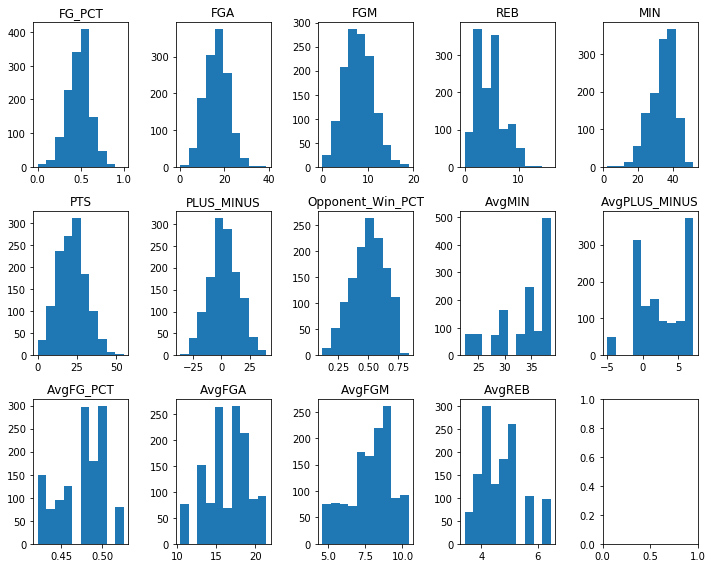

In [123]:
num1=['FG_PCT', 'FGA', 'FGM', 'REB', 'MIN', 'PTS','PLUS_MINUS','Opponent_Win_PCT',
      'AvgMIN','AvgPLUS_MINUS','AvgFG_PCT', 'AvgFGA', 'AvgFGM', 'AvgREB']
# To determine the distribution of our numerical data
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 8))
for c, ax in zip(num1, axes.ravel()):
    ax.hist(dwa[c].dropna(), bins=10)
    ax.set_title(c)
plt.tight_layout()
plt.show()

Well, it seems that our data are quite balanced, then no need to apply a log in this example. It might be useful though if we want to do the same on other players or on the full dataset.

__Built test and train sets__

__ml_data__  *(Full Version)*<br>Create the main set of features to be used by removing the one I don't need or are overlapping and those that we used specifically for the EDA part. As a reminder I am working only with average from the season for the prediction, as I want to use only feature that we ignore before the game (e.g we can't tell how much rebond the player will take during the game).

In [3]:
# Create the set of features to be used by removing the one I don't need or are overlapping
ml_data= dwa.drop(['GAME_ID', 'TEAM_ID', 'TEAM_CITY', 'PLAYER_NAME', 'FG_PCT', 'FGA', 'FGM', 'REB', 'MIN', 'PTS', 'PLUS_MINUS','GAME_DATE_EST',
                  'TEAM_ID_home','HOME_TEAM_CITY','VISITOR_TEAM_CITY', 'Opponent_City_Ori',
                   'SEASON_Ori', 'weekday_Ori', 'month_Ori', 'START_POSITION_ori', 'Home/Away_Ori',], axis=1)

In [4]:
# Full version
x= ml_data.values
y= dwa.PTS.values
print(x.shape)
print(y.shape)

(1299, 83)
(1299,)


In [5]:
# Split data for the test and train set
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

__ml_lite__ *(Light Version)*<br> Here I create a second set of features, with less features. My choice is based on keeping only the feature I think are the most releavant and cutting some of the features I created. For example I removed weekdays, because in my EDA I noticed that it did not bring a lot.

In [6]:
ml_lite= dwa[['AvgMIN', 'AvgPLUS_MINUS', 'AvgFG_PCT', 'AvgFGA', 'AvgFGM', 'AvgREB', 'Opponent_Win_PCT','START_POSITION_C', 'START_POSITION_F', 'START_POSITION_G',
             'START_POSITION_substitute', 'SEASON_2003', 'SEASON_2004', 'SEASON_2005', 'SEASON_2006', 'SEASON_2007', 'SEASON_2008', 'SEASON_2009', 'SEASON_2010', 'SEASON_2011',
             'SEASON_2012', 'SEASON_2013', 'SEASON_2014', 'SEASON_2015', 'SEASON_2016', 'SEASON_2017', 'SEASON_2018', 'SEASON_2019', 'month_April', 'month_December', 'month_February', 'month_January',
             'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'month_September', 'TEAM_WIN']]
# light version
x0= ml_lite.values
x0.shape

(1299, 39)

In [7]:
x_tr0, x_te0 = train_test_split(x0, train_size=0.8, test_size=0.2, random_state=0)

I also create a version to __standardize with the StandardScaler__.

In [8]:
from sklearn.preprocessing import StandardScaler
# Standardize data
scaler = StandardScaler()
# For the ml_data
x_tr1 = scaler.fit_transform(x_tr)
x_te1 = scaler.transform(x_te)
# For the ml_lite
x_tr00 = scaler.fit_transform(x_tr0)
x_te00 = scaler.transform(x_te0)

In [131]:
# Check data shape
print(x_tr.shape)
print(y_tr.shape)
print(x_te.shape)
print(y_te.shape)
print(x_tr1.shape)
print(x_te1.shape)
print(x_tr00.shape)
print(x_te00.shape)

(1039, 83)
(1039,)
(260, 83)
(260,)
(1039, 83)
(260, 83)
(1039, 39)
(260, 39)


### Models

To run my __supervised learning model__, I use differents method such as:
 - Multiple linear regression (no scaling)
     - It is a good first approach to predict continuous values.
 - Huber loss (scaling, provided a better results after having tried both)
     - As we previously noticed, our dataset has a few outliers (really a few...), Huber Loss is most robust in dealing with those.
 - Knn regressor (require scaling), with and without Hyperparamters tuning.
     - To calculate the distance and capture the idea of similarity cases amongst my data.
 - Random Forest regressor (no scaling), with and without Hyperparamters tuning.
   - It seems that this ensemble decision tree model works pretty well with non numeric data, and I have quite some in dataset.
 
I initially tried with a Ridge regression model, but results were not better, then I decided to remove.<br>
Let's discover results below.

__Set the baseline__

As a metrics, I'll use the mean absolute error (MAE) to measures the absolute values of the residuals.

In [10]:
#MAE as baseline 
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

___Multiple Linear Regression___

First I try to run my model with the linear regression.<br>
__Light Version__

In [133]:
from sklearn.linear_model import LinearRegression
# linear regression light Version
lr0 = LinearRegression()
lr0.fit(x_tr0, y_tr)
y_pred_lr0 = lr0.predict(x_te0)

mae_lr0 = MAE(y_te, y_pred_lr0)
print('MAE linear regression Light Version: {:.3f}'.format(mae_lr0))

MAE linear regression Light Version: 5.479


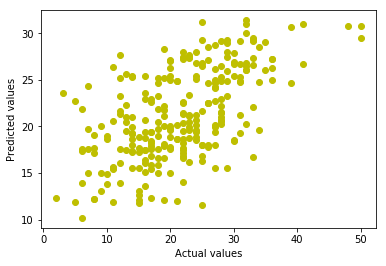

In [134]:
# Plot to compare predicted vs Actual 
plt.plot(y_te, y_pred_lr0, 'yo')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

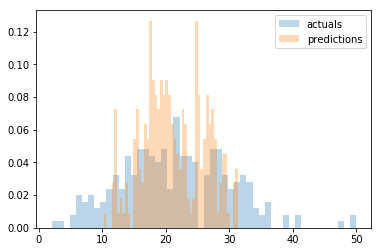

In [169]:
# Plot prediction
plt.hist(y_te, density=True, alpha=0.3, label='actuals', bins=50)
plt.hist(y_pred_lr0, density=True, alpha=0.3, label='predictions', bins=50)
plt.legend()
plt.show()

There is a couple of outliers, but the shape of the points make me think that we could fit easily fit a line.

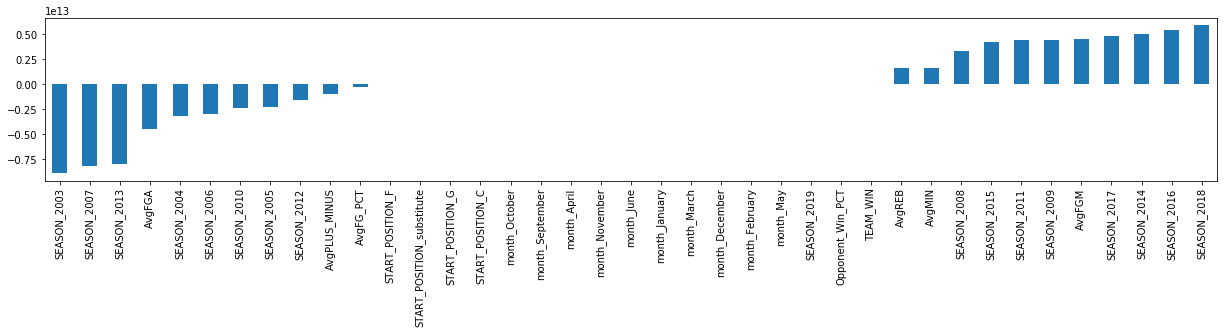

In [135]:
# To determine feature importance with the coefficient method
coef0 = pd.Series(lr0.coef_, index = ml_lite.columns)
imp_coef0 = coef0.sort_values()
imp_coef0.plot(kind = "bar", figsize=(21,3));

In general, with those charts (this one and other below) I decided not to remove any features, because we if we can see that they don't have an impact on this selected player, it might be not the case with other players.

In [136]:
# linear regression full version
lr = LinearRegression()
lr.fit(x_tr, y_tr)
y_pred_lr = lr.predict(x_te)

mae_lr = MAE(y_te, y_pred_lr)
print('MAE linear regression Full Version: {:.3f}'.format(mae_lr))

MAE linear regression Full Version: 5.499


Those results are actually quite good and even somewhat better with the light version as the Prediction is below 5.5 points.


___Huber Loss___

For the second model, I try to run it with the Huber Loss regressor, starting with the __Light Version__

In [137]:
from sklearn.linear_model import HuberRegressor
# Huber Loss light version
huber1 = HuberRegressor(epsilon=1.5, max_iter=15)
huber1.fit(x_tr00, y_tr)
y_pred_huber00 = huber1.predict(x_te00)

mae_huber00 = MAE(y_te, y_pred_huber00)
print('MAE Huber Light Version: {:.3f}'.format(mae_huber00))

MAE Huber Light Version: 5.492


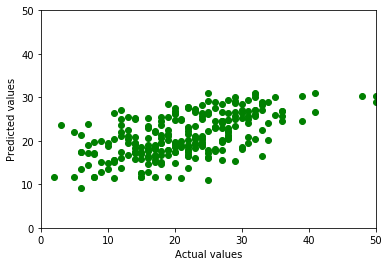

In [138]:
# Plot to compare predicted vs Actual 
plt.plot(y_te, y_pred_huber00, 'go')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.axis([0, 50, 0, 50])
plt.show()

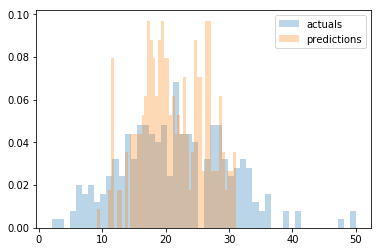

In [170]:
# Plot prediction
plt.hist(y_te, density=True, alpha=0.3, label='actuals', bins=50)
plt.hist(y_pred_huber00, density=True, alpha=0.3, label='predictions', bins=50)
plt.legend()
plt.show()

Model seems working not so bad, but not able to predict high / low value.

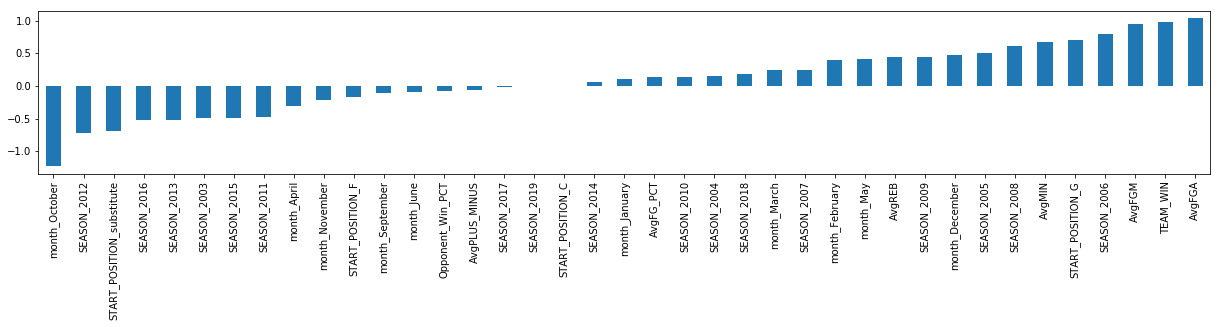

In [139]:
# To determine feature importance with the coefficient method
coef = pd.Series(huber1.coef_, index = ml_lite.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "bar", figsize=(21,3));

__Full Version__

In [140]:
# Huber Loss full version
huber = HuberRegressor(epsilon=1.8, max_iter=18)
huber.fit(x_tr1, y_tr)
y_pred_huber1 = huber.predict(x_te1)

mae_huber1 = MAE(y_te, y_pred_huber1)
print('MAE Huber Full Version: {:.3f}'.format(mae_huber1))

MAE Huber Full Version: 5.511


Compared to the multiple linear regression, our results are slightly below.<br> On this occasion, I have just played around with the epsilon and the iter to get a good results. As we can see, except 3, every features have "importance".

___KNN Regressor___

First I'll work with the simple version before trying to tune the hyperparameters.

Original __light version__.<br>
With default parameters (or almost, 40 has been randomly put it here).

In [141]:
from sklearn.neighbors import KNeighborsRegressor
# KNN regressor light version
neigh = KNeighborsRegressor(n_neighbors=40)
neigh.fit(x_tr00, y_tr)
y_pred_KnnReg00 = neigh.predict(x_te00)

mae_KnnReg00 = MAE(y_te, y_pred_KnnReg00)
print('MAE KnnRegressor Light Version: {:.3f}'.format(mae_KnnReg00))

MAE KnnRegressor Light Version: 5.599


Then let's try to finetune the parameters using Kfold to work on the train data before doing the final test on test set.

In [142]:
# Create the pipe
pipe = Pipeline([('kn',KNeighborsRegressor(n_neighbors=28, weights='uniform', leaf_size=30 ,p=2))])
# parameters Grid
grid = {'kn__n_neighbors':[20,23,24,25,26,27,30],
        'kn__weights': ['distance','uniform'],
        'kn__leaf_size':[5,7,9,10,12,14,15,16,17,20],
        'kn__p':[1, 2, 3]}                                                 
# Kfold
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
# Add Cross validation
grid_cv_kn = GridSearchCV(pipe, grid, cv=kfold, return_train_score=True, n_jobs=2, scoring='neg_mean_absolute_error')
grid_cv_kn.fit(x_tr00, y_tr)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=28, p=2,
          weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'kn__n_neighbors': [20, 23, 24, 25, 26, 27, 30], 'kn__weights': ['distance', 'uniform'], 'kn__leaf_size': [5, 7, 9, 10, 12, 14, 15, 16, 17, 20], 'kn__p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [143]:
grid_cv_kn.best_estimator_

Pipeline(memory=None,
     steps=[('kn', KNeighborsRegressor(algorithm='auto', leaf_size=12, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=27, p=1,
          weights='uniform'))])

I will eventually apply the best parameters chosen by the models

In [144]:
neigh = KNeighborsRegressor(n_neighbors=27, weights='uniform', leaf_size=12 ,p=1)
neigh.fit(x_tr00, y_tr)
y_pred_KnnReg00 = neigh.predict(x_te00)

mae_KnnReg00 = MAE(y_te, y_pred_KnnReg00)
print('MAE KnnRegressor Light Version after HP finetune: {:.3f}'.format(mae_KnnReg00))

MAE KnnRegressor Light Version after HP finetune: 5.572


On this occasion, tuning HP improved a little bit the MAE.

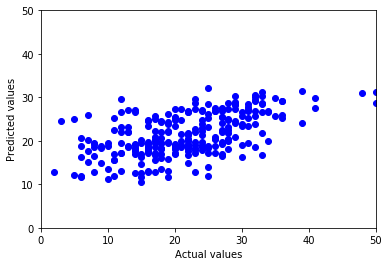

In [145]:
# Plot to compare predicted vs Actual 
plt.plot(y_te, y_pred_KnnReg00, 'bo')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.axis([0, 50, 0, 50])
plt.show()

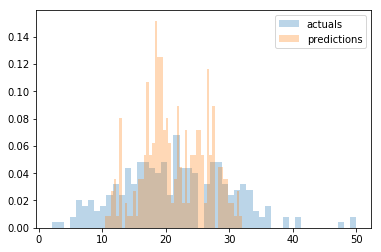

In [171]:
# Plot prediction
plt.hist(y_te, density=True, alpha=0.3, label='actuals', bins=50)
plt.hist(y_pred_KnnReg00, density=True, alpha=0.3, label='predictions', bins=50)
plt.legend()
plt.show()

Same comment as above, no prediction out of 10-30 range. Is the model too robust to outliers or are my data unpredictable?

Below I work with the __Full Version__

In [146]:
# KNN regressor full version
neigh = KNeighborsRegressor(n_neighbors=28)
neigh.fit(x_tr1, y_tr)
y_pred_KnnReg1 = neigh.predict(x_te1)

mae_KnnReg1 = MAE(y_te, y_pred_KnnReg1)
print('MAE KnnRegressor Full Version: {:.3f}'.format(mae_KnnReg1))

MAE KnnRegressor Full Version: 5.981


As already done above, the pipe below to __Fine Tune my hyperparameters__ using KFold splitting in 2 my trainset.

In [147]:
# Create the pipe
pipe = Pipeline([('kn',KNeighborsRegressor(n_neighbors=28, weights='uniform', leaf_size=30 ,p=2))])
# parameters Grid
grid = {'kn__n_neighbors':[15,20,23,24,25,27,30],
        'kn__weights': ['distance','uniform'],
        'kn__leaf_size':[5,7,8,9,10,11,12,15,20],
        'kn__p':[1, 2, 3]}                                                 
# Kfold
kfold = KFold(n_splits=2, shuffle=True, random_state=0)
# Add Cross validation
grid_cv_kn_fu = GridSearchCV(pipe, grid, cv=kfold, return_train_score=True, n_jobs=2, scoring='neg_mean_absolute_error' )
grid_cv_kn_fu.fit(x_tr1, y_tr)

GridSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=28, p=2,
          weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'kn__n_neighbors': [15, 20, 23, 24, 25, 27, 30], 'kn__weights': ['distance', 'uniform'], 'kn__leaf_size': [5, 7, 8, 9, 10, 11, 12, 15, 20], 'kn__p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [148]:
# Display the best params
grid_cv_kn_fu.best_params_

{'kn__leaf_size': 5,
 'kn__n_neighbors': 30,
 'kn__p': 1,
 'kn__weights': 'uniform'}

In [149]:
neigh = KNeighborsRegressor(n_neighbors=30, weights='uniform', leaf_size=5 ,p=1)
neigh.fit(x_tr1, y_tr)
y_pred_KnnReg1_hp = neigh.predict(x_te1)

mae_KnnReg1_hp = MAE(y_te, y_pred_KnnReg1_hp)
print('MAE KnnRegressor Full Version after HP finetune: {:.3f}'.format(mae_KnnReg1_hp))

MAE KnnRegressor Full Version after HP finetune: 5.678


Here we notice that after hyperparameters tuning our result are better, which was not always the case with Lebron James.

___Random Forest Regressor___

First trial with random Forest Regressor with __Light Version__, the results is already good, below find the version with tuned hyperparameters.

In [150]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, n_estimators=10, random_state=0)
regr.fit(x_tr0, y_tr)
y_pred_RandFor0 = regr.predict(x_te0)

mae_RandFor0 = MAE(y_te, y_pred_RandFor0)
print('MAE Random Forest Regressor Light Version: {:.3f}'.format(mae_RandFor0))

MAE Random Forest Regressor Light Version: 5.493


Hyperparameters tuning.

In [151]:
# Create the pipe
pipe = Pipeline([('rf',RandomForestRegressor(max_depth=5, n_estimators=10, random_state=0))])
# parameters Grid
grid = {'rf__n_estimators':[40,50,60,65,70,75,80],
        'rf__max_depth':[1, 2, 3, 4, 5, 6, 10],
        'rf__criterion':['mse','mae']}                                                 
# Kfold
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
# Add Cross validation
grid_cv = GridSearchCV(pipe, grid, cv=kfold, return_train_score=True, n_jobs=2, scoring='neg_mean_absolute_error')
grid_cv.fit(x_tr0, y_tr)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('rf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'rf__n_estimators': [40, 50, 60, 65, 70, 75, 80], 'rf__max_depth': [1, 2, 3, 4, 5, 6, 10], 'rf__criterion': ['mse', 'mae']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [152]:
# Display the best params
grid_cv.best_params_

{'rf__criterion': 'mae', 'rf__max_depth': 3, 'rf__n_estimators': 70}

Then apply our best parameters.

In [153]:
regr = RandomForestRegressor(max_depth=3, criterion='mae', n_estimators=70, random_state=0)
regr.fit(x_tr0, y_tr)
y_pred_RandFor0 = regr.predict(x_te0)

mae_RandFor0_HP = MAE(y_te, y_pred_RandFor0)
print('MAE Random Forest Regressor Light Version after HP finetune: {:.3f}'.format(mae_RandFor0_HP))

MAE Random Forest Regressor Light Version after HP finetune: 5.714


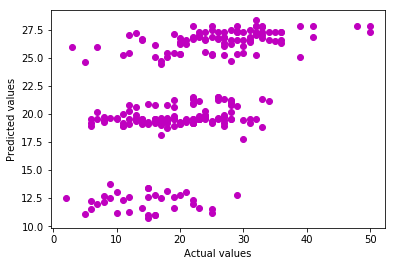

In [154]:
# Plot to compare predicted vs Actual 
plt.plot(y_te, y_pred_RandFor0, 'mo')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

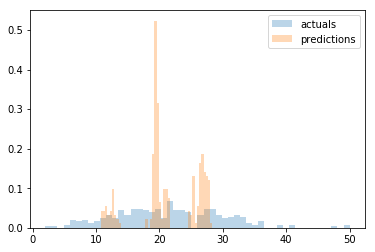

In [172]:
# Plot prediction
plt.hist(y_te, density=True, alpha=0.3, label='actuals', bins=50)
plt.hist(y_pred_RandFor0, density=True, alpha=0.3, label='predictions', bins=50)
plt.legend()
plt.show()

Here the visual is a bit different that others. It seems more packed and a with some unusual with space. The decision tree seems being to categorical.

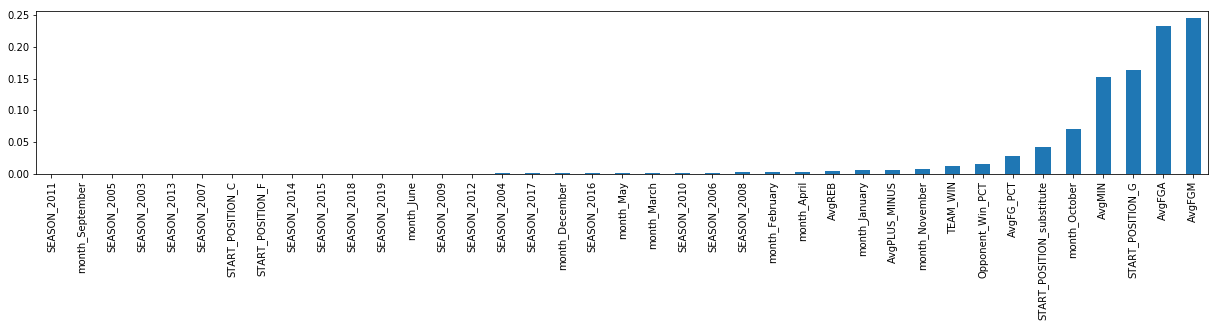

In [155]:
# To determine feature importance with the coefficient method
feat_imp = pd.Series(regr.feature_importances_, index = ml_lite.columns)
feat_imp = feat_imp.sort_values()
feat_imp.plot(kind = "bar", figsize=(21,3));

Here suprisingly not a lot of features have an importance, but the ones that have makes sense.

__Full Version__

In [156]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(x_tr, y_tr)
y_pred_RandFor = regr.predict(x_te)

mae_RandFor = MAE(y_te, y_pred_RandFor)
print('MAE Random Forest Regressor Full version: {:.3f}'.format(mae_RandFor))

MAE Random Forest Regressor Full version: 5.512


C:\Users\nicolas\Anaconda3\envs\exts-ml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [157]:
# Create the pipe
pipe = Pipeline([('rf',RandomForestRegressor(max_depth=5, n_estimators=10, random_state=0))])
# parameters Grid
grid = {'rf__n_estimators':[65,70,75,80,85],
        'rf__max_depth':[4, 5,6,7],
        'rf__criterion':['mse','mae']}                                                 
# Kfold
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
# Add Cross validation
grid_cv_fu = GridSearchCV(pipe, grid, cv=kfold, return_train_score=True, n_jobs=2, scoring='neg_mean_absolute_error')
grid_cv_fu.fit(x_tr, y_tr)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('rf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'rf__n_estimators': [65, 70, 75, 80, 85], 'rf__max_depth': [4, 5, 6, 7], 'rf__criterion': ['mse', 'mae']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [158]:
grid_cv_fu.best_params_

{'rf__criterion': 'mae', 'rf__max_depth': 5, 'rf__n_estimators': 70}

In [159]:
regr = RandomForestRegressor(max_depth=5, n_estimators=70, criterion='mae', random_state=0)
regr.fit(x_tr, y_tr)
y_pred_RandFor = regr.predict(x_te)

mae_RandFor = MAE(y_te, y_pred_RandFor)
print('MAE Random Forest Regressor Full version After Tune: {:.3f}'.format(mae_RandFor))

MAE Random Forest Regressor Full version After Tune: 5.704


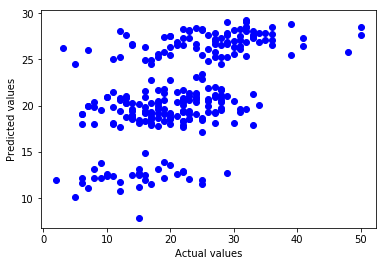

In [160]:
# Plot to compare predicted vs Actual 
plt.plot(y_te, y_pred_RandFor, 'bo')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

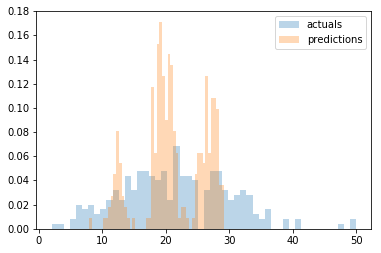

In [173]:
# Plot prediction
plt.hist(y_te, density=True, alpha=0.3, label='actuals', bins=50)
plt.hist(y_pred_RandFor, density=True, alpha=0.3, label='predictions', bins=50)
plt.legend()
plt.show()

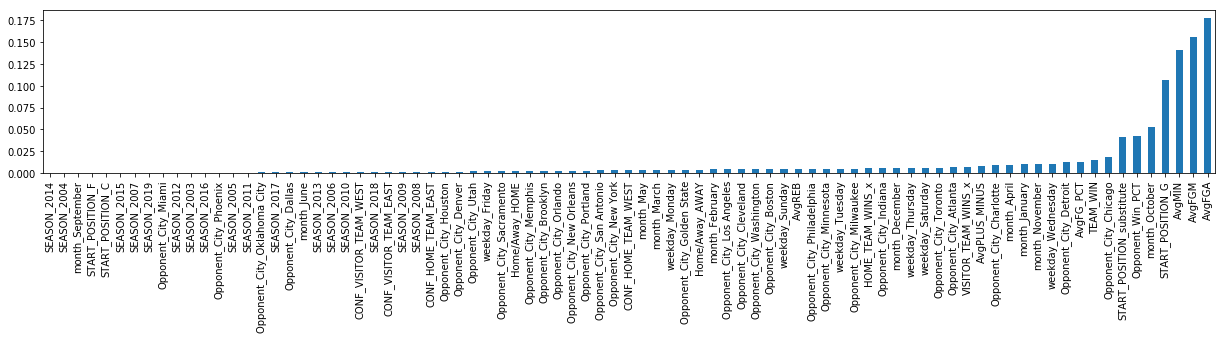

In [161]:
# To determine feature importance with the coefficient method
feat_impfu = pd.Series(regr.feature_importances_, index = ml_data.columns)
feat_impfu = feat_impfu.sort_values()
feat_impfu.plot(kind = "bar", figsize=(21,3));

My random Forest operates quite well with this player and is using almost all my feature. I spotted a interesting details that demonstrates that is works well; Season 2019 which has no "importance", has indeed no impact because he retired in 2018. Quite surprisingly, the full version uses all feature, as the light version (already lighter by definition) is not.

__Trial with Ridge__

In [11]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.5)
ridge.fit(x_tr1, y_tr)
y_values_ridge1 = ridge.predict(x_te1)

mae_rid1 = MAE(y_te, y_values_ridge1)
print('MAE Ridge Full Version: {:.3f}'.format(mae_rid1))

MAE Ridge Full Version: 5.499


In [12]:
# Create the pipe
pipe = Pipeline([('ri',Ridge(alpha=1.5, random_state=0))])
# parameters Grid
grid = {'ri__alpha':np.logspace(-10, 10, num=100)}                                                 
# Kfold
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
# Add Cross validation
grid_cv_ri = GridSearchCV(pipe, grid, cv=kfold, return_train_score=True, n_jobs=2, scoring='neg_mean_absolute_error')
grid_cv_ri.fit(x_tr00, y_tr)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('ri', Ridge(alpha=1.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'ri__alpha': array([1.00000e-10, 1.59228e-10, ..., 6.28029e+09, 1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [13]:
grid_cv_ri.best_params_

{'ri__alpha': 83.02175681319736}

In [14]:
cv_resultsri = pd.DataFrame(grid_cv_ri.cv_results_)
cols = ['mean_test_score', 'mean_train_score','param_ri__alpha' ]
cv_resultsri[cols].sort_values('mean_test_score', ascending=False).head(1)

,mean_test_score,mean_train_score,param_ri__alpha
59,-5.962748,-5.740125,83.0218


In [15]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=83.02175681319736)
ridge.fit(x_tr00, y_tr)
y_values_ridge1 = ridge.predict(x_te00)

mae_rid1 = MAE(y_te, y_values_ridge1)
print('MAE Ridge Full Version: {:.3f}'.format(mae_rid1))

MAE Ridge Full Version: 5.482


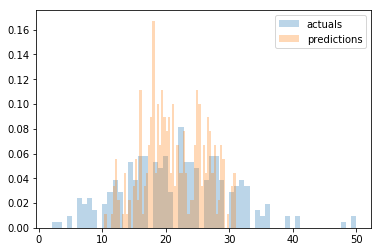

In [16]:
# Plot prediction
plt.hist(y_te, density=True, alpha=0.3, label='actuals', bins=60)
plt.hist(y_values_ridge1, density=True, alpha=0.3, label='predictions', bins=60)
plt.legend()
plt.show()

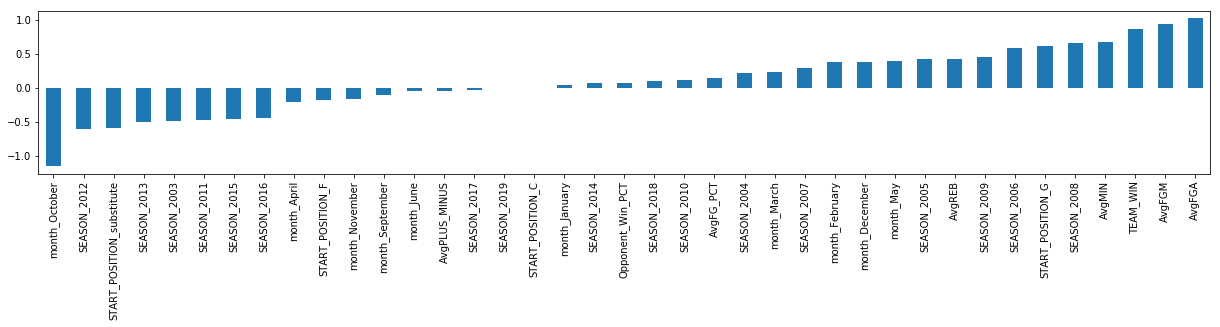

In [17]:
feat = pd.Series(ridge.coef_, index = ml_lite.columns)
feat = feat.sort_values()
feat.plot(kind = "bar", figsize=(21,3));

### Final Comparison

In [162]:
# Final comparison
# Baseline
mae_baseline = MAE(y_te,np.mean(y_te))
print(mae_baseline)

6.830502958579882


On the bar plot below, I decided to display only the most performing of each model.

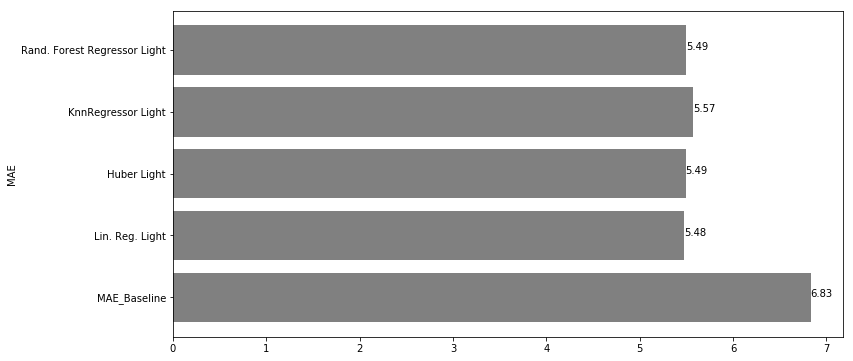

In [163]:
# Bar plot
mae_values = [mae_baseline, mae_lr0, mae_huber00, mae_KnnReg00, mae_RandFor0 ]
titles = ['MAE_Baseline', 'Lin. Reg. Light','Huber Light', 'KnnRegressor Light', 'Rand. Forest Regressor Light']

xcor = np.arange(len(mae_values))
plt.figure(figsize=(12,6))
plt.barh(xcor, mae_values,color='grey')
plt.yticks(xcor, titles)

for index, value in enumerate(mae_values):
    plt.text(value, index, ("%.2f" % value))

plt.ylabel('MAE')
plt.show()

Compared to the resutls obtained with Lebron James, we can say the Dwayne is easier to predict. Indeed I quite drastically reduced his MAE and the gap with the baseline is much more important, about 25%. My basic regression worked slighly better, but the Random Forest is also performing very well. Basically, the 3 models have the same results.<br>
Interestingly, all the "light" versions worked better on him, which was not the case with LBJ. My assumption is in this case, as the Dwayne Wade seems easier to predict, additional features could create noise.
<br>
To finish by him is also quite rewarding, as the result starts to be interesting.

### To go further...

 - Try other trainset/testset size
 - Try with other players (around 10)
  - Determine what are the features that are never used (dimensionality reduction) to see if it improves results
 - To actually apply a log on scoring see if allows closer predictions
 - Try (harder) a Ridge with tuning parameters to fight overfitting (regularization)
 
### Comments for improvements

 - EDA: For the chart when Miami, display number of games play in each teams.
 - EDA: Plot month in right order, from JAN to DEC, easier to read.
 - EDA: For the opponent chart (1st one) Use a violin view, it is better to read.
 - ML: Use regularization in Ridge regression 
 - ML: Use grid search fine tune for the Huber Loss as well
 
 
 